In [1]:
import numpy as np
import os
import math

import matplotlib.pyplot as plt

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

import optimalrcs,metrics,plots,cut_profiles

In [2]:
traj=np.load('data/Wind_driven_sigma_0,45_beta_0,198_dt_1.npy', allow_pickle=True).item()

In [3]:
xtraj=traj['Trajectory'][:1000000,:]
labels=traj['Labels'][:1000000]
xtraj.shape, labels.shape, np.unique(labels)

((1000000, 4), (1000000,), array([-1,  0,  1]))

In [4]:
i_traj=np.ones_like(labels)
i_traj

array([1, 1, 1, ..., 1, 1, 1])

In [5]:
def fes2d(q,x,ax):

       # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(q, x, bins=100)
    
    # Avoid log(0) by setting zero counts to a small positive value
    hist_safe = np.where(hist > 0, hist, 0.01)
    
    # Compute -log(n) to simulate free energy landscape
    free_energy = -np.log(hist_safe)
    
    # Plot the free energy landscape
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(free_energy.T, origin='lower', extent=extent, cmap='jet', aspect='auto')
    fig.colorbar(im, label='$\\quad-\\ln P_{ss}$')
    ax.set(xlabel='q', ylabel='$A_1$', ylim=(-2,2), xlim=(-0.01,1.01))
    ax.grid()


128
4680.0
#=1000, xent=0.204528, mse=0.063878, sdzq=21.3935, dzq=69.5117, dr2=4739.88, auc=0.974666, |dx|=0.301391, time=14.3374
#=2000, xent=0.20213, mse=0.0635756, sdzq=21.2211, dzq=64.006, dr2=4702.01, auc=0.974954, |dx|=0.0093473, time=28.3663
#=3000, xent=0.201722, mse=0.0633998, sdzq=20.6639, dzq=61.9128, dr2=4678.97, auc=0.975117, |dx|=0.0047586, time=42.4161
#=4000, xent=0.200281, mse=0.0633108, sdzq=22.8198, dzq=64.8415, dr2=4670.74, auc=0.975297, |dx|=0.00473075, time=56.4425
#=5000, xent=0.200176, mse=0.0631736, sdzq=23.0931, dzq=65.4329, dr2=4685.67, auc=0.975343, |dx|=0.00432633, time=70.4583
#=6000, xent=0.199663, mse=0.0630951, sdzq=22.2824, dzq=67.4067, dr2=4697.51, auc=0.975444, |dx|=0.00377555, time=84.4921
#=7000, xent=0.201049, mse=0.0631622, sdzq=24.3143, dzq=62.4405, dr2=4680.29, auc=0.975264, |dx|=0.0241805, time=98.5124
#=8000, xent=0.199201, mse=0.0627647, sdzq=18.7652, dzq=48.6198, dr2=4683.63, auc=0.975579, |dx|=0.0128891, time=112.526
#=9000, xent=0.197793,

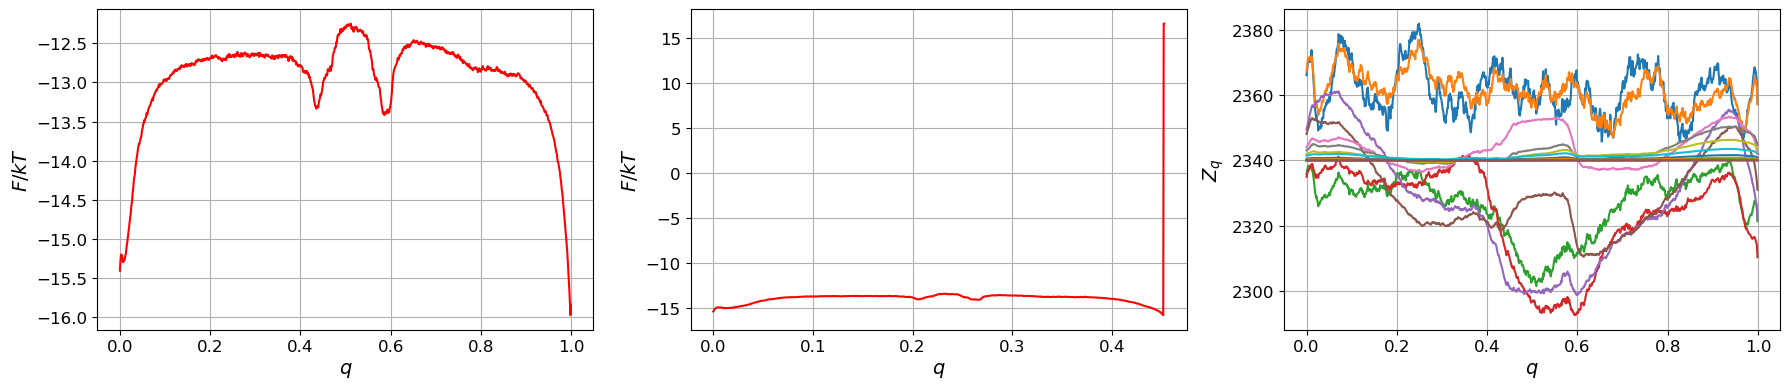

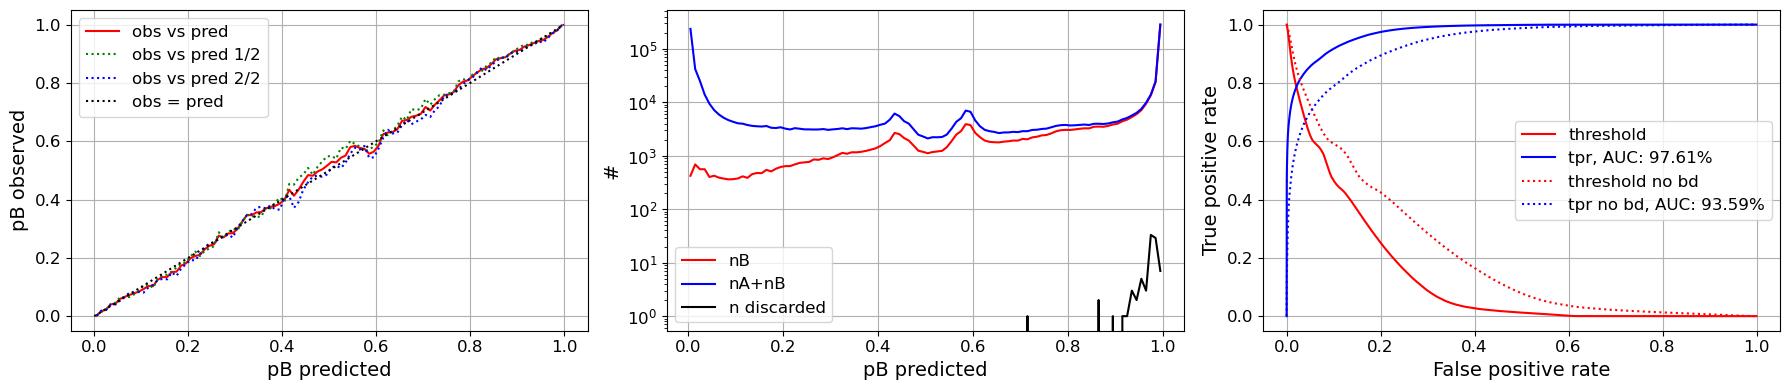

In [6]:
def comp_y():
    return xtraj[:,np.random.choice(range(xtraj.shape[1]))]

optimalrcs.envelope_scale=.1
history=[0,1]
yr_type=['y(t-d),r(t-d)']


# 128 20000
seed=128
print(seed)
q=optimalrcs.CommittorNE(boundary0=labels==0,boundary1=labels==1,i_traj=i_traj)
print (metrics.low_bound_delta_r2_eq(q).get())
np.random.seed(seed)
q.fit_transform(comp_y, history_delta_t=history, gamma=0.1, max_iter=20000, history_type=yr_type, min_delta_x=1e-4)
q.plots_feps(delta_t_sim=1e-3)
q.plots_obs_pred()


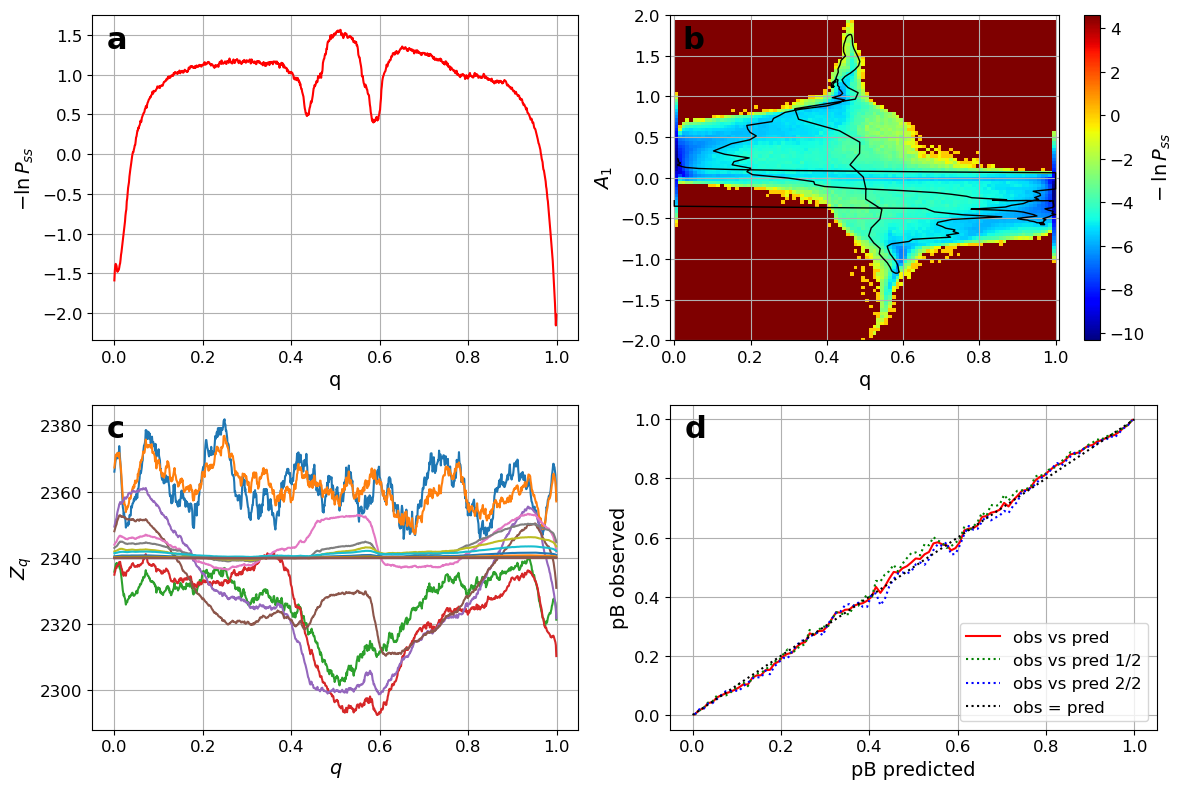

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.get()
lx, lzh = cut_profiles.comp_zca(q.r_traj, a=-1, i_traj=q.i_traj)
axes[0,0].plot(lx.get()[:-2], -np.log(2 * lzh.get()[:-2]/len(q.r_traj)),'-r')
axes[0,0].set(ylabel='$-\\ln P_{ss}$', xlabel='q')
axes[0,0].grid()

plots.plot_zq(axes[1,0], q.r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary)
#axes[1,0].set(ylim=(1600-3,1660+5))
plots.plot_obs_pred_q(axes[1,1], q.r_traj, q.future_boundary)
axes[1,1].legend(loc='lower right')
fes2d(r_traj,xtraj[:,0],axes[0,1])
st,end=3846,4127
axes[0,1].plot(r_traj[st:end],xtraj[st:end,0],'-k', lw=1)
fig.tight_layout()
plt.savefig("Fig6.pdf",format='pdf')